In [1]:
#Jovian Commit Essentials

!pip install jovian --upgrade -q
import jovian
jovian.set_project('photo-quality-prediction')
jovian.set_colab_id('1jSSyHS7y541RxLob0aOb5vMfUalU3QgS')

# Photo Quality Prediction

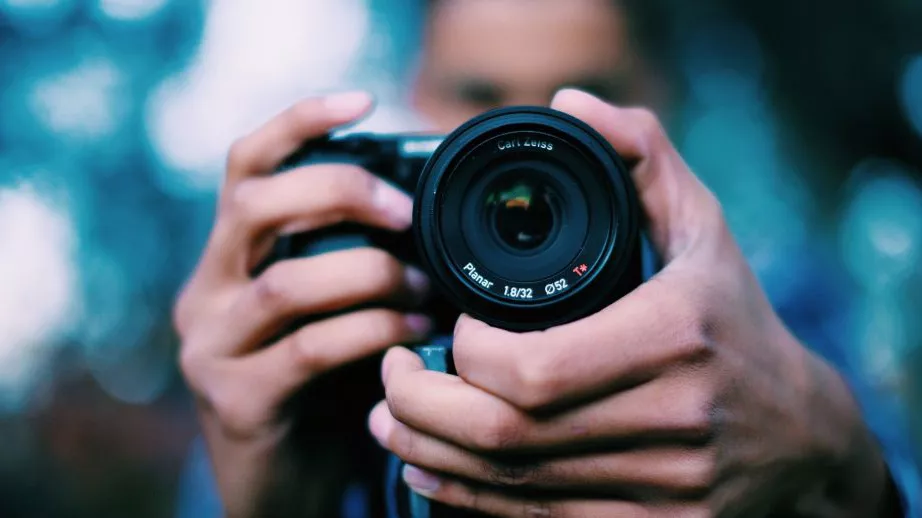
Image Source: https://www.oxfordonlineenglish.com/photo-editing

Dataset Link: [https://www.kaggle.com/competitions/PhotoQualityPrediction](https://www.kaggle.com/competitions/PhotoQualityPrediction)


**Main Objective**

Given anonymized information on thousands of photo albums, predict whether a human evaluator would mark them as **'good'**.


**Description**

This Dataset is taken from **Kaggle** organized by **Featured Prediction Competition** which contains total **10 columns** and **40,262 rows**. It contains columns like **id, latitude, longitude, width, height, size, name, description, caption and good (target column)**. Using the relevant information given in this dataset, i will bulid two machine learning models to predict the quality of photo and let's see whether the models can give the accurate prediction using this dataset information.

# 1. Downloading Dataset

In [2]:
# Installing required libraries

!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet

In [3]:
# Publishing notebook to Jovian profile

import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/kowshikchakraborty6/photo-quality-prediction


'https://jovian.com/kowshikchakraborty6/photo-quality-prediction'

In [4]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/PhotoQualityPrediction'

In [6]:
od.download(dataset_url)

Skipping, found downloaded files in "./PhotoQualityPrediction" (use force=True to force download)


In [7]:
data_dir = 'PhotoQualityPrediction'

In [8]:
!ls -lh {data_dir}

total 7.2M
-rw-r--r-- 1 root root 106K Feb 28 15:09 example_entry.csv
-rw-r--r-- 1 root root 1.6M Feb 28 15:09 test.csv
-rw-r--r-- 1 root root 5.5M Feb 28 15:09 training.csv


In [9]:
#Number of rows in training set

!wc -l {data_dir}/training.csv

40263 PhotoQualityPrediction/training.csv


In [10]:
#Number of rows in test set

!wc -l {data_dir}/test.csv

12000 PhotoQualityPrediction/test.csv


In [11]:
 #Showing the dataset as dataframe
 import pandas as pd #Importing required libraray 
 dataset_df = pd.read_csv('PhotoQualityPrediction/training.csv')
 dataset_df

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1


# 2. Finding If There Is Any Missing Values

In [12]:
# In training set

training_df = pd.read_csv('PhotoQualityPrediction/training.csv')
 
percent_missing_train = training_df.isnull().sum() * 100 / len(training_df)
missing_value_df_train = pd.DataFrame({'column_name': training_df.columns,
                                 'percent_missing': percent_missing_train})
missing_value_df_train

,column_name,percent_missing
id,id,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
width,width,0.000000
height,height,0.000000
size,size,0.000000
name,name,11.916944
description,description,68.461577
caption,caption,29.325419
good,good,0.000000


In [13]:
# In test set

test_df = pd.read_csv('PhotoQualityPrediction/test.csv')

percent_missing_test = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df_test = pd.DataFrame({'column_name': test_df.columns,
                                 'percent_missing': percent_missing_test})
missing_value_df_test

,column_name,percent_missing
id,id,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
width,width,0.000000
height,height,0.000000
size,size,0.000000
name,name,12.283333
description,description,68.808333
caption,caption,29.650000


From the above, we found some missing values in **name, description and caption** column. The highest percentage of missing values we found in description column (aprrox 69% for both train & test set).

We visualized it as a barplot shown below,

In [14]:
#Installing and importing required libraries

!pip install matplotlib seaborn --quiet
!pip install plotly folium --upgrade --quiet

import matplotlib
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt

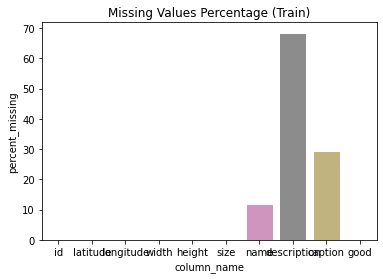

In [15]:
#In training set

plt.title('Missing Values Percentage (Train)')
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(data=missing_value_df_train, x='column_name', y='percent_missing');

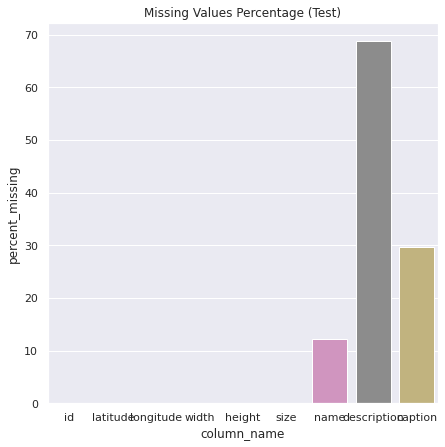

In [16]:
#In Test set

plt.title('Missing Values Percentage (Test)')
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(data=missing_value_df_test, x='column_name', y='percent_missing');

# 3. Some Exploratory Analysis of The Dataset

In [17]:
#Importing required library

import numpy as np

In [18]:
 #Showing training set as dataframe
 
 training_df

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1


In [19]:
 #Showing test set as dataframe
 
 test_df

,id,latitude,longitude,width,height,size,name,description,caption
0,40265,34,-118,640,478,1,51 125,NaN,1481 1905 2060 2071 483
1,40266,34,-83,413,604,12,744,749 1905 36 740 1433,NaN
2,40267,42,-87,720,480,44,2102 670,2040 643 594 297 1881 737 1304 2102 2136 712 1...,807 142
3,40268,54,-2,604,453,18,1744,NaN,NaN
4,40269,20,77,604,405,60,193 944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11995,52260,42,-75,720,540,71,2119,NaN,2073 880 1914 1612 1040 1304 1920 1915 1365 51...
11996,52261,26,-80,604,453,60,2068,NaN,1733 875 474 1200 469 51 1939 439 1616
11997,52262,36,-120,604,402,17,NaN,51 2070 1901 367,1048 2132
11998,52263,47,-112,604,453,33,772,NaN,2068 1123 712


In [20]:
#Showing shape (rows & columns) of training set

training_df.shape

(40262, 10)

In [21]:
#Showing shape (rows & columns) of test set

test_df.shape

(12000, 9)

In [22]:
#Showing types of features

training_df.dtypes

id              int64
latitude        int64
longitude       int64
width           int64
height          int64
size            int64
name           object
description    object
caption        object
good            int64
dtype: object

In [23]:
#Showing the description (total, mean etc.)

training_df.describe()

,id,latitude,longitude,width,height,size,good
count,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000,40262.000000
mean,20132.204312,30.342854,-37.662213,587.654265,503.571581,39.872783,0.262133
std,11623.143325,20.503580,81.312267,108.089076,105.710218,42.195029,0.439800
min,1.000000,-55.000000,-175.000000,0.000000,0.000000,1.000000,0.000000
25%,10066.250000,24.000000,-98.000000,540.000000,453.000000,12.000000,0.000000
50%,20132.500000,37.000000,-76.000000,604.000000,453.000000,27.000000,0.000000
75%,30197.750000,42.000000,19.000000,640.000000,576.000000,55.000000,1.000000
max,40263.000000,72.000000,178.000000,720.000000,720.000000,1030.000000,1.000000


In [24]:
#Showing barplot of good quality of photo accroding to size

# plt.title('Good quality of photo in terms of size')
# sns.barplot(data=training_df.head(15), x='good', y='size');

Let's see the relation between all the features using correlation heatmap, (A correlation heatmap is a graphical representation of a correlation matrix, which shows the pairwise correlation between different features in a dataset. The heatmap visualizes the strength and direction of the linear relationship between pairs of features.)

<AxesSubplot:title={'center':'Correlation Heatmap'}>

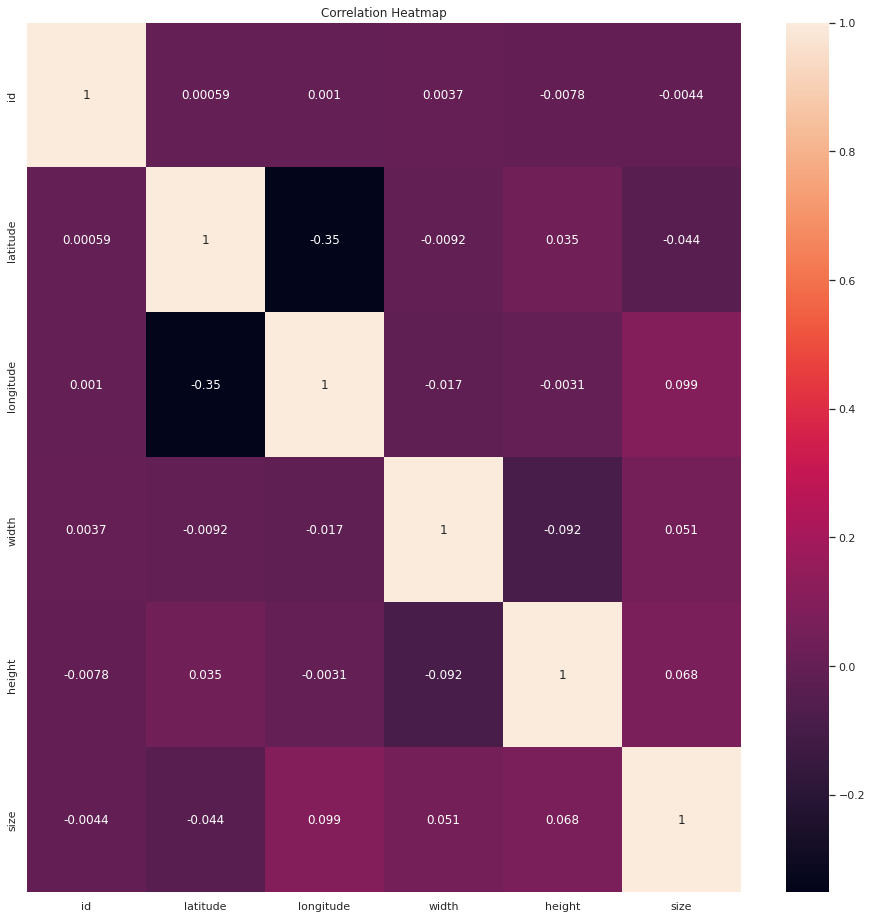

In [25]:
corr = training_df.iloc[:, :-1].corr()
correlation = corr.index
plt.figure(figsize = (16, 16))
plt.title('Correlation Heatmap')
sns.heatmap(training_df[correlation].corr(), annot = True)

We can see from the above correlation matrix that maxium correlation are negative correlation. There are also presence of postive correlation but overall, we can say that correlation between all the feautres are weak. (means there is not strong positive or negative relation between the features.)

Let's check the distribution of the target variable **good**,

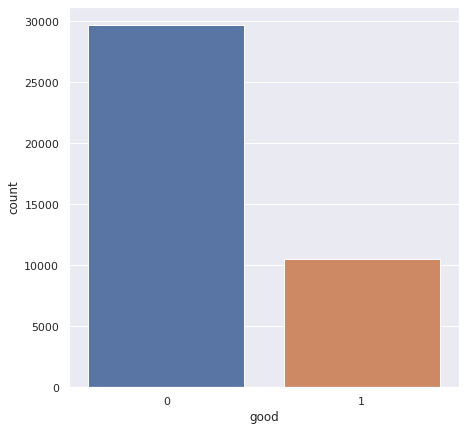

In [26]:
sns.countplot(x='good', data=training_df)
plt.show()

We also visualized it with percentage given below,

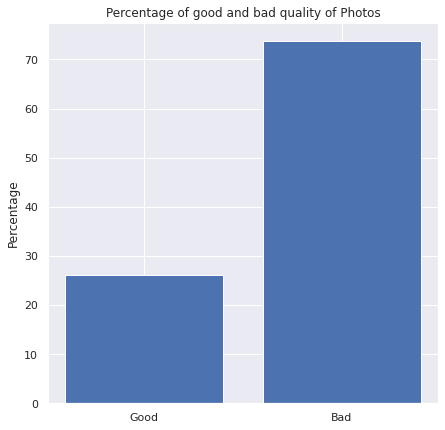

In [27]:
# Get the count of good and bad photos
good_count = (training_df['good'] == 1).sum()
bad_count = (training_df['good'] == 0).sum()

# Calculate the percentage of good and bad photos
good_percent = good_count / len(training_df) * 100
bad_percent = bad_count / len(training_df) * 100

# Create a bar plot of the percentage of good and bad photos
plt.bar(['Good', 'Bad'], [good_percent, bad_percent])
plt.title('Percentage of good and bad quality of Photos')
plt.ylabel('Percentage')
plt.show()

So, from the above, we can say that over 70% photos are bad quality photos and approximately 25% photos are good.

Let's visualize the distribution of some columns using histograms,

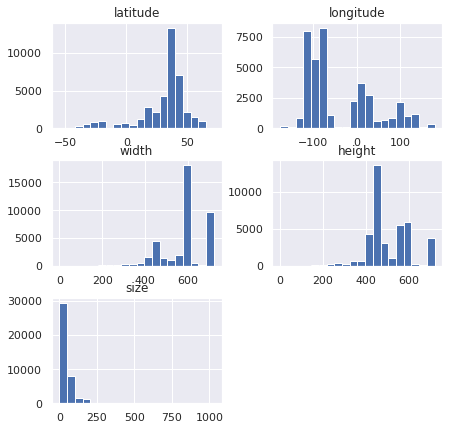

<Figure size 720x720 with 0 Axes>

In [28]:
training_df.hist(column=['latitude', 'longitude', 'width', 'height', 'size'], bins=20)
plt.figure(figsize = (10, 10))
plt.show()

We can also explore the relationship between the target variable **good** and some of the other variables using a scatter plot,

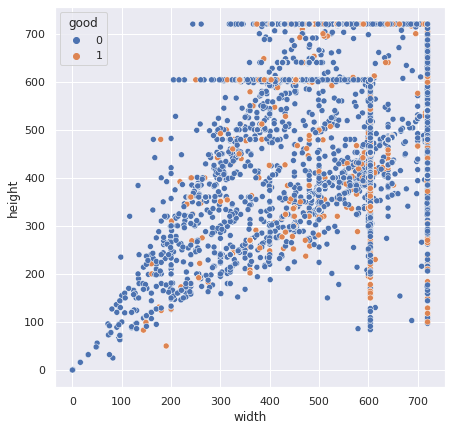

In [29]:
sns.scatterplot(x='width', y='height', hue='good', data=training_df)
plt.show()

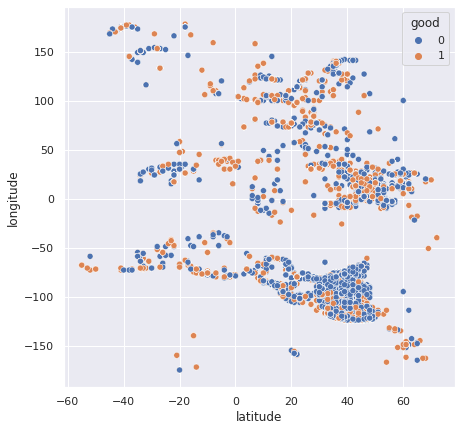

In [30]:
sns.scatterplot(x='latitude', y='longitude', hue='good', data=training_df)
plt.show()

Also let's Visualize the relationship between the **good** column and the **size** column,

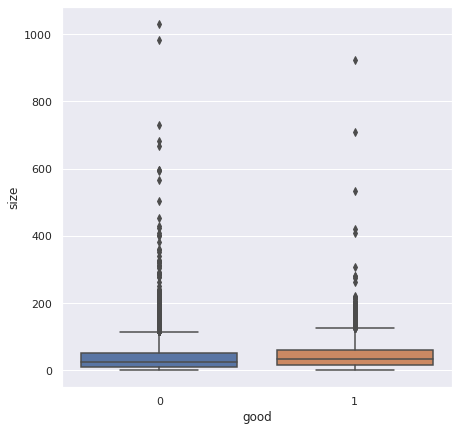

In [31]:
sns.boxplot(x='good', y='size', data=training_df)
plt.show()

The above figure shows a box plot showing the distribution of the **size** column for each value of the **good** column.

# 4. Working With Categorical Columns

In [32]:
#identifying categorical columns
cat_training = [feature for feature in training_df if training_df[feature].dtypes == 'O']
cat_test = [feature for feature in test_df if test_df[feature].dtypes == 'O']

cat_training
cat_test

['name', 'description', 'caption']

From the above code, we can see that there are three categorical columns ['name', 'description', 'caption']. We can make those columns numerical by extracting some numerical features from them.

At first, we should make a copy of the dataset so that we can keep the original dataset.

In [33]:
#Makaing a copy of the dataset

training_df_copy = training_df.copy(deep=True)
test_df_copy = test_df.copy(deep=True)

In [34]:
training_df_copy

,id,latitude,longitude,width,height,size,name,description,caption,good
0,1,45,16,604,453,31,454 1659,NaN,NaN,1
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0
2,3,38,-97,720,540,71,802,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1


In [35]:
test_df_copy

,id,latitude,longitude,width,height,size,name,description,caption
0,40265,34,-118,640,478,1,51 125,NaN,1481 1905 2060 2071 483
1,40266,34,-83,413,604,12,744,749 1905 36 740 1433,NaN
2,40267,42,-87,720,480,44,2102 670,2040 643 594 297 1881 737 1304 2102 2136 712 1...,807 142
3,40268,54,-2,604,453,18,1744,NaN,NaN
4,40269,20,77,604,405,60,193 944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11995,52260,42,-75,720,540,71,2119,NaN,2073 880 1914 1612 1040 1304 1920 1915 1365 51...
11996,52261,26,-80,604,453,60,2068,NaN,1733 875 474 1200 469 51 1939 439 1616
11997,52262,36,-120,604,402,17,NaN,51 2070 1901 367,1048 2132
11998,52263,47,-112,604,453,33,772,NaN,2068 1123 712


In [36]:
#Extracting train categorical columns
training_df_copy['new_name'] = training_df_copy['name'].str.extract(r'.*(\d\d).*').astype(float)
training_df_copy['new_description'] = training_df_copy['description'].str.extract(r'.*(\d\d).*').astype(float)
training_df_copy['new_caption'] = training_df_copy['caption'].str.extract(r'.*(\d\d).*').astype(float)

In [37]:
#Extracting test categorical columns
test_df_copy['new_name'] = test_df_copy['name'].str.extract(r'.*(\d\d).*').astype(float)
test_df_copy['new_description'] = test_df_copy['description'].str.extract(r'.*(\d\d).*').astype(float)
test_df_copy['new_caption'] = test_df_copy['caption'].str.extract(r'.*(\d\d).*').astype(float)

In [38]:
training_df_copy

,id,latitude,longitude,width,height,size,name,description,caption,good,new_name,new_description,new_caption
0,1,45,16,604,453,31,454 1659,NaN,NaN,1,59.0,NaN,NaN
1,2,21,-87,720,534,43,2068 483,687 1182 1309 2068 2107 78 89 453 1905 712 120...,830 2112 1914 792 814 1386 474 2146 1591 194 5...,0,83.0,13.0,41.0
2,3,38,-97,720,540,71,802,NaN,NaN,0,2.0,NaN,NaN
3,4,38,-122,604,453,24,NaN,924 1914 671 853 193 51 744 1437 1245 563 1410...,665 2040 792 1056 226 248 1612 1920 617 1365 1...,0,NaN,6.0,9.0
4,5,-29,24,720,540,13,1766 20,NaN,181 891 22 2123 2107 523 2080 683 1640 166 109...,0,20.0,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,919 1905 2088,1490 1644 919 1905 2088 1192 796,687 830 1017 990 2123 22 1309 1903 611 1304 12...,0,88.0,96.0,97.0
40258,40260,38,-120,604,453,4,1325 1348,2018 1426,1744 2015 658 164 54,0,48.0,26.0,54.0
40259,40261,29,-82,604,453,37,51 1829 367,NaN,786 830 1347 2057 792 1826 1716 1920 2041 171 ...,0,67.0,NaN,18.0
40260,40262,24,121,604,453,25,1443 1869,NaN,368 2029 1309 1573 755 370 1905 1823 916 740 1...,1,69.0,NaN,62.0


So, we can now drop the three columns ['name', 'description', 'caption'] since we have created new columns for them.

In [39]:
training_df_copy.drop(columns = ['name', 'description','caption'], inplace= True)
test_df_copy.drop(columns = ['name', 'description','caption'], inplace= True)

In [40]:
training_df_copy

,id,latitude,longitude,width,height,size,good,new_name,new_description,new_caption
0,1,45,16,604,453,31,1,59.0,NaN,NaN
1,2,21,-87,720,534,43,0,83.0,13.0,41.0
2,3,38,-97,720,540,71,0,2.0,NaN,NaN
3,4,38,-122,604,453,24,0,NaN,6.0,9.0
4,5,-29,24,720,540,13,0,20.0,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,0,88.0,96.0,97.0
40258,40260,38,-120,604,453,4,0,48.0,26.0,54.0
40259,40261,29,-82,604,453,37,0,67.0,NaN,18.0
40260,40262,24,121,604,453,25,1,69.0,NaN,62.0


In [41]:
#Re-odering the training dataset
training_df_copy = training_df_copy[['id','latitude','longitude','width','height','size','new_name','new_description','new_caption','good']]

In [42]:
training_df_copy

,id,latitude,longitude,width,height,size,new_name,new_description,new_caption,good
0,1,45,16,604,453,31,59.0,NaN,NaN,1
1,2,21,-87,720,534,43,83.0,13.0,41.0,0
2,3,38,-97,720,540,71,2.0,NaN,NaN,0
3,4,38,-122,604,453,24,NaN,6.0,9.0,0
4,5,-29,24,720,540,13,20.0,NaN,62.0,0
...,...,...,...,...,...,...,...,...,...,...
40257,40259,39,-77,604,453,18,88.0,96.0,97.0,0
40258,40260,38,-120,604,453,4,48.0,26.0,54.0,0
40259,40261,29,-82,604,453,37,67.0,NaN,18.0,0
40260,40262,24,121,604,453,25,69.0,NaN,62.0,1


# 5. Working With Missing Values And Scaling

From part-2 (Finding Missing Values), we have seen that there are some missing values in **name**, **description** & **caption** columns. So, let's fill those missing values.

But at first we need to know which technique is useful (mean, median or mode) to fill the missing values in that case. To know this, we can plot density plot of **name**, **description** & **caption** columns,

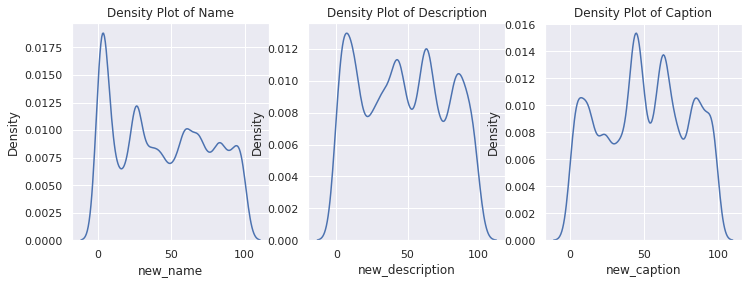

In [43]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot a histogram of the 'new_name' column
sns.kdeplot(training_df_copy['new_name'], ax=axes[0])
axes[0].set_title('Density Plot of Name')

# Plot a density plot of the 'new_description' column
sns.kdeplot(training_df_copy['new_description'], ax=axes[1])
axes[1].set_title('Density Plot of Description')

# Plot a histogram of the 'new_caption' column
sns.kdeplot(training_df_copy['new_caption'], ax=axes[2])
axes[2].set_title('Density Plot of Caption')

plt.show()

From the above figure, we can see that there is no normal distribution in name, description and caption columns and we know that mean technique is very useful if the data is normally distributed. So, we can not perform mean technique. We also can not perform mode here becuse mode works well in case of categorical values/data. So, there is only one option left and that is the median technique. So, we will use median technique to fill the missing values.

In [44]:
#For training set:

# Find the mean value of the non-missing values in the 'new_name' column
name_median = training_df_copy['new_name'][pd.notnull(training_df_copy['new_name'])].astype(float).median()

# Fill in the missing values in the 'new_name' column with the mean value
training_df_copy['new_name'].fillna(name_median, inplace=True)

# Repeat for 'new_description' and 'new_caption' columns
description_median = training_df_copy['new_description'][pd.notnull(training_df_copy['new_description'])].astype(float).median()
training_df_copy['new_description'].fillna(description_median, inplace=True)

caption_median = training_df_copy['new_caption'][pd.notnull(training_df_copy['new_caption'])].astype(float).median()
training_df_copy['new_caption'].fillna(caption_median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [45]:
#For test set:

# Find the mean value of the non-missing values in the 'new_name' column
name_median = test_df_copy['new_name'][pd.notnull(test_df_copy['new_name'])].astype(float).median()

# Fill in the missing values in the 'new_name' column with the mean value
test_df_copy['new_name'].fillna(name_median, inplace=True)

# Repeat for 'new_description' and 'new_caption' columns
description_median = test_df_copy['new_description'][pd.notnull(test_df_copy['new_description'])].astype(float).median()
test_df_copy['new_description'].fillna(description_median, inplace=True)

caption_median = test_df_copy['new_caption'][pd.notnull(test_df_copy['new_caption'])].astype(float).median()
test_df_copy['new_caption'].fillna(caption_median, inplace=True)

In [46]:
training_df_copy.isna().sum()

id                 0
latitude           0
longitude          0
width              0
height             0
size               0
new_name           0
new_description    0
new_caption        0
good               0
dtype: int64

In [47]:
test_df_copy.isna().sum()

id                 0
latitude           0
longitude          0
width              0
height             0
size               0
new_name           0
new_description    0
new_caption        0
dtype: int64

Let's identify input & target columnns,

In [48]:
input = list(training_df_copy.columns)[1:-1]
target = 'good'

In [52]:
train_inputs = training_df_copy[input]
train_targets = training_df_copy[target]

In [53]:
test_inputs = test_df_copy[input]
test_targets = training_df_copy[target]

Also let's see the numeric columns,

In [54]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['latitude', 'longitude', 'width', 'height', 'size', 'new_name', 'new_description', 'new_caption']


### Imputing Missing Numeric Values

In [55]:
from sklearn.impute import SimpleImputer #Importing required library

#Training
imputer = SimpleImputer().fit(training_df_copy[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [56]:
#Test
imputer = SimpleImputer().fit(test_df_copy[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [57]:
test_inputs[numeric_cols].isna().sum()

latitude           0
longitude          0
width              0
height             0
size               0
new_name           0
new_description    0
new_caption        0
dtype: int64

### Scaling Numeric Features

In [58]:
from sklearn.preprocessing import RobustScaler #Importing required library

#Training
scaler = RobustScaler().fit(training_df_copy[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [59]:
#Test
scaler = RobustScaler().fit(test_df_copy[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [60]:
from sklearn.model_selection import train_test_split #Importing required library

X_train, X_val, Y_train, Y_val = train_test_split(
    train_inputs[numeric_cols], train_targets, test_size=0.30, random_state=42)

# Training ML Models

## Decision Tree Classifier

In [62]:
#Importing required library

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [72]:
def predict_and_plot(inputs, targets, name=''):
  # predict the target variable on the test set
  preds = dtc.predict(inputs)

  # evaluate the accuracy of the classifier
  acc = accuracy_score(targets, preds)
  print("Decision Tree classifier accuracy:", acc)

  # create a confusion matrix
  cm = confusion_matrix(targets, preds)

  # plot the confusion matrix
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
  plt.title("Confusion Matrix - Decision Tree Classifier {}".format(name));
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  return preds

Decision Tree classifier accuracy: 0.9989710108930916


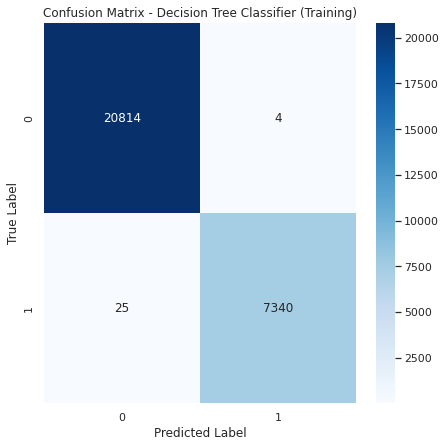

In [74]:
train_preds = predict_and_plot(X_train, Y_train, '(Training)')

Decision Tree classifier accuracy: 0.6752214587300274


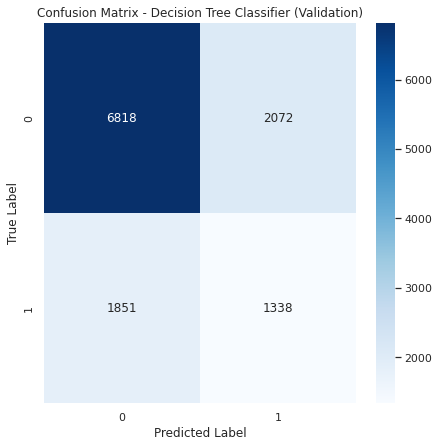

In [75]:
test_preds = predict_and_plot(X_val, Y_val, '(Validation)')

In [77]:
test_pred = dtc.predict_proba(test_inputs[numeric_cols])
decision_tree_pred = pd.DataFrame(test_pred)
decision_tree_pred.columns = ['No', 'Yes']
decision_tree_pred

,No,Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
11995,1.0,0.0
11996,1.0,0.0
11997,1.0,0.0
11998,0.0,1.0


Let's see the feature importance of this model,

In [78]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtc.feature_importances_
}).sort_values('importance', ascending=False)

In [79]:
importance_df.head(10)

,feature,importance
4,size,0.195083
1,longitude,0.163024
5,new_name,0.150483
7,new_caption,0.143698
0,latitude,0.127127
3,height,0.091270
6,new_description,0.072362
2,width,0.056953


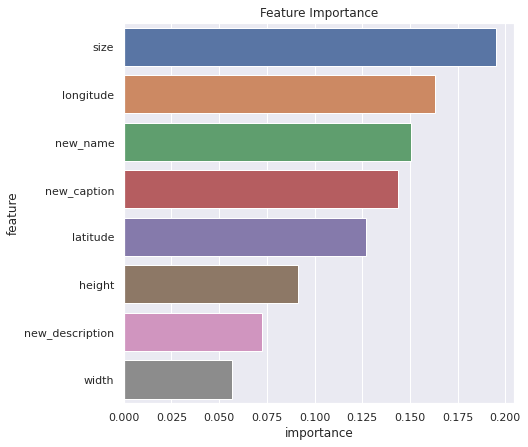

In [80]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

From the above, we can say that **size** & **longitude** are two important features.

## XGBoost Classifier

In [81]:
from xgboost import XGBClassifier #Importing required library

In [82]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier()

In [89]:
def predict_and_plot(inputs, targets, name=''):
  # predict the target variable on the test set
  preds2 = xgb.predict(inputs)

  # evaluate the accuracy of the classifier
  acc2 = accuracy_score(targets, preds2)
  print("XGBoost classifier accuracy:", acc2)

  # create a confusion matrix
  cm = confusion_matrix(targets, preds2)

  # plot the confusion matrix
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
  plt.title("Confusion Matrix - XGBoost Classifier {}".format(name));
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  return preds2

XGBoost classifier accuracy: 0.7568747117056381


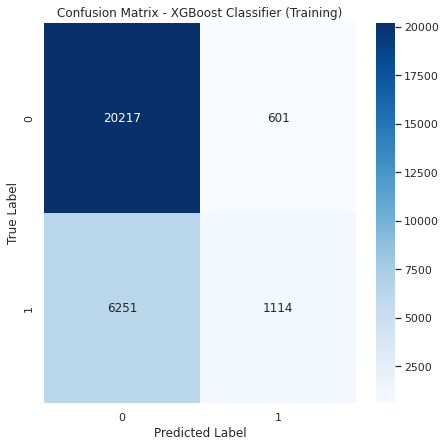

In [90]:
train_preds2 = predict_and_plot(X_train, Y_train, '(Training)')

XGBoost classifier accuracy: 0.750641609404752


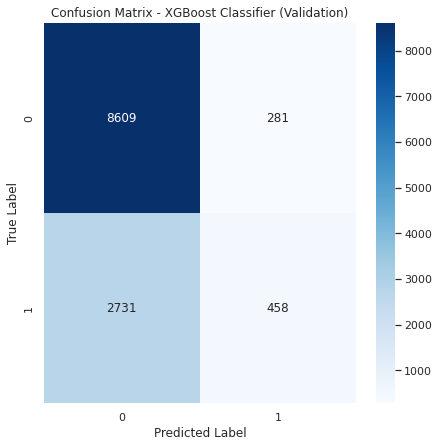

In [91]:
test_preds2 = predict_and_plot(X_val, Y_val, '(Validation)')

# Hyperparameter Tuning (XGBoost Classifier)

In [118]:
#Importing required library
from xgboost import XGBClassifier

def test_params(**params):
    model = XGBClassifier(**params).fit(X_train, Y_train)
    train_acc = accuracy_score(model.predict(X_train), Y_train)
    val_acc = accuracy_score(model.predict(X_val), Y_val)
    return train_acc, val_acc

In [119]:
def test_param_and_plot(param_name, param_values):
    train_accs, val_accs = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, val_acc = test_params(**params)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, val_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])

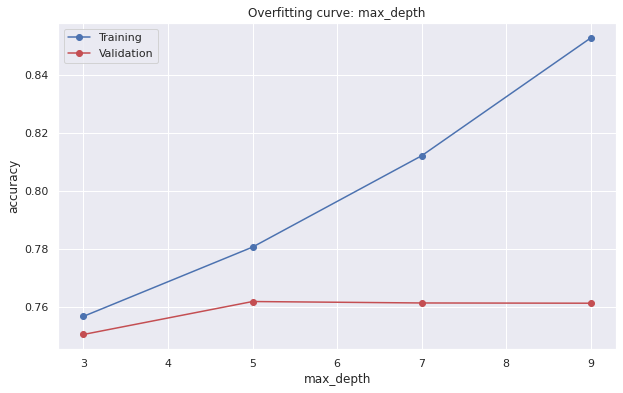

In [120]:
test_param_and_plot('max_depth', [3, 5, 7, 9])

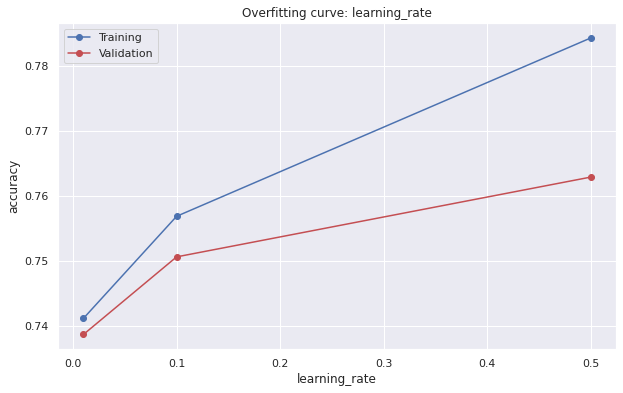

In [121]:
test_param_and_plot("learning_rate" , [0.01, 0.1, 0.5])

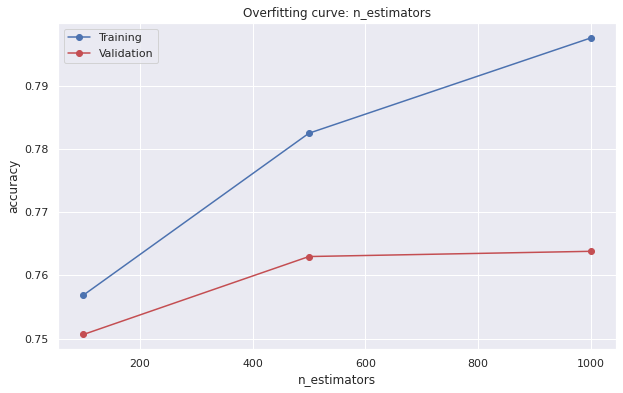

In [122]:
test_param_and_plot("n_estimators" , [100, 500, 1000])

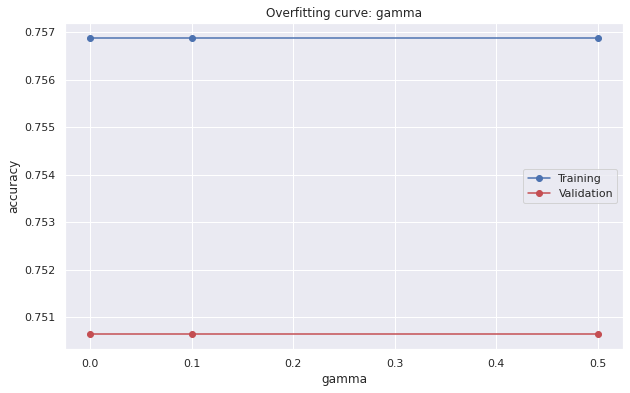

In [123]:
 test_param_and_plot("gamma" , [0, 0.1, 0.5])

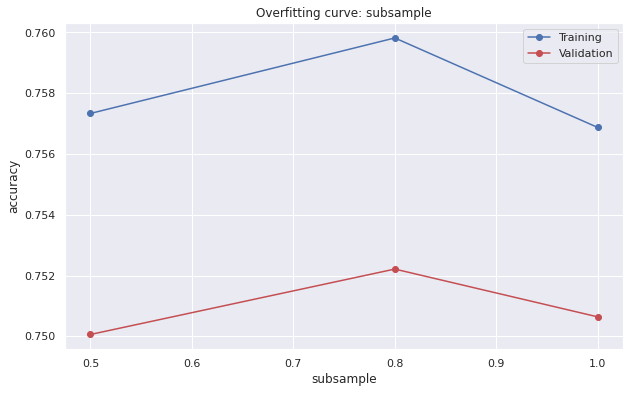

In [124]:
test_param_and_plot("subsample" , [0.5, 0.8, 1.0],)

So, we can see that in case of improving, **learning_rate** and **n_estimators** these two parameters wroked well.

In [134]:
%%time
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators = 450, max_depth = 4, subsample = 0.6).fit(X_train, Y_train)

CPU times: user 12.9 s, sys: 34.7 ms, total: 12.9 s
Wall time: 13.1 s


In [135]:
def predict_and_plot(inputs, targets, name=''):
  # predict the target variable on the test set
  preds3 = xgb_model.predict(inputs)

  # evaluate the accuracy of the classifier
  acc3 = accuracy_score(targets, preds3)
  print("XGBoost classifier accuracy:", acc3)

  # create a confusion matrix
  cm = confusion_matrix(targets, preds3)

  # plot the confusion matrix
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
  plt.title("Confusion Matrix - XGBoost Classifier Hyperparameter Tuning {}".format(name));
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  return preds3

XGBoost classifier accuracy: 0.8061952240712487


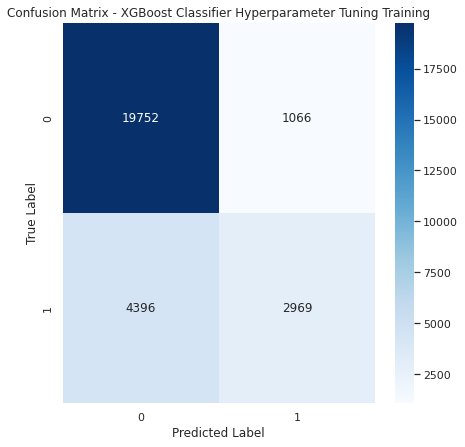

In [136]:
train_preds3 = predict_and_plot(X_train, Y_train, 'Training')

XGBoost classifier accuracy: 0.7652123520158953


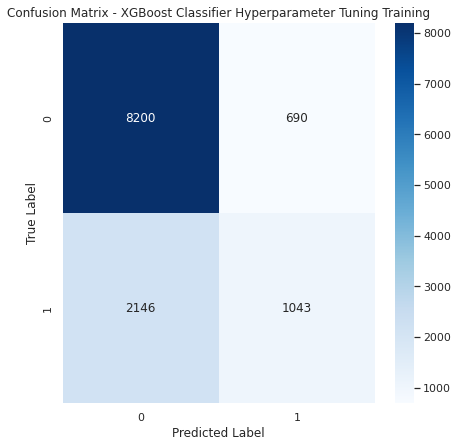

In [137]:
test_preds3 = predict_and_plot(X_val, Y_val, 'Training')

We can see after hyperparameter tuning, training & validation accuracy of XGBoost Classifier slightly increased. We can also try different parameters and analyse which parameters are the best to provide a satisfactory accuracy.



Moreover, we can say that among Decision Tree and XGBoost, The **XGBoost** model perfomred better.

In [138]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.com/kowshikchakraborty6/photo-quality-prediction


'https://jovian.com/kowshikchakraborty6/photo-quality-prediction'